In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pplt
from datetime import datetime
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime

In [ ]:
df = pd.read_csv('v7_QoS_cleaned.csv')
print(df.shape)
#QUES_date tous les questionnaires ont été remplis en mars 2017
#Deux variables necessitant une analyse emotionelle selon trois modalités:positive,negative,neutre
df=df.drop(['Quest_Date','Opert_Orange_Offer_Below_Expectations','Opert_Orange_Offer_Beyond_Expectations'],axis=1)
df.head()

(1025, 72)


,city,Gender,NB_Emp,Size_Comp,Sect_Comp,Type_Smart,Opert_Comp,Opert_Princ,Opert_Period,s7_orange,...,Invoice_recieved,Payment_Method,Internet_payment,firstInvoice_place,InvoicingSystems _estimation,receiptInvoice _deadline,Invoice_easiness,Invoice_ correctness,using_OfCredit_centralized,serviceDistribCentralizedCredit_quality.1
0,TUNIS,1,20.0,0,Industrie,1,Orange/Ooredoo,Ooredoo,1 an à moins de 2 ans,Les abonnements mobiles sont fournis par l’en...,...,0,0,0,0,7,7,7,7,0,11
1,TUNIS,0,11.0,0,Services,1,Orange,Orange,3 ans ou plus,Certains ou tous les employés ont leur propre...,...,0,0,0,0,7,7,7,7,0,8
2,TUNIS,0,11.0,0,Services,1,Orange,Orange,3 ans ou plus,Certains ou tous les employés ont leur propre...,...,0,1,0,0,4,5,6,7,0,5
3,SFAX,0,10.0,0,Industrie,1,Ooredoo,Ooredoo,3 mois à moins de 6 mois,NaN,...,0,0,0,0,7,7,7,7,0,8
4,TUNIS,0,12.0,0,Santé (Healthcare),0,Orange/Tunisie Télécom,Tunisie Télécom,3 ans ou plus,Certains ou tous les employés ont leur propre...,...,0,0,0,0,3,2,2,5,0,5


<AxesSubplot:ylabel='None'>

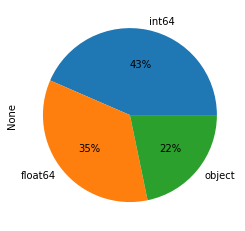

In [ ]:
df.dtypes.value_counts().plot.pie(autopct='%1.0f%%')

<AxesSubplot:>

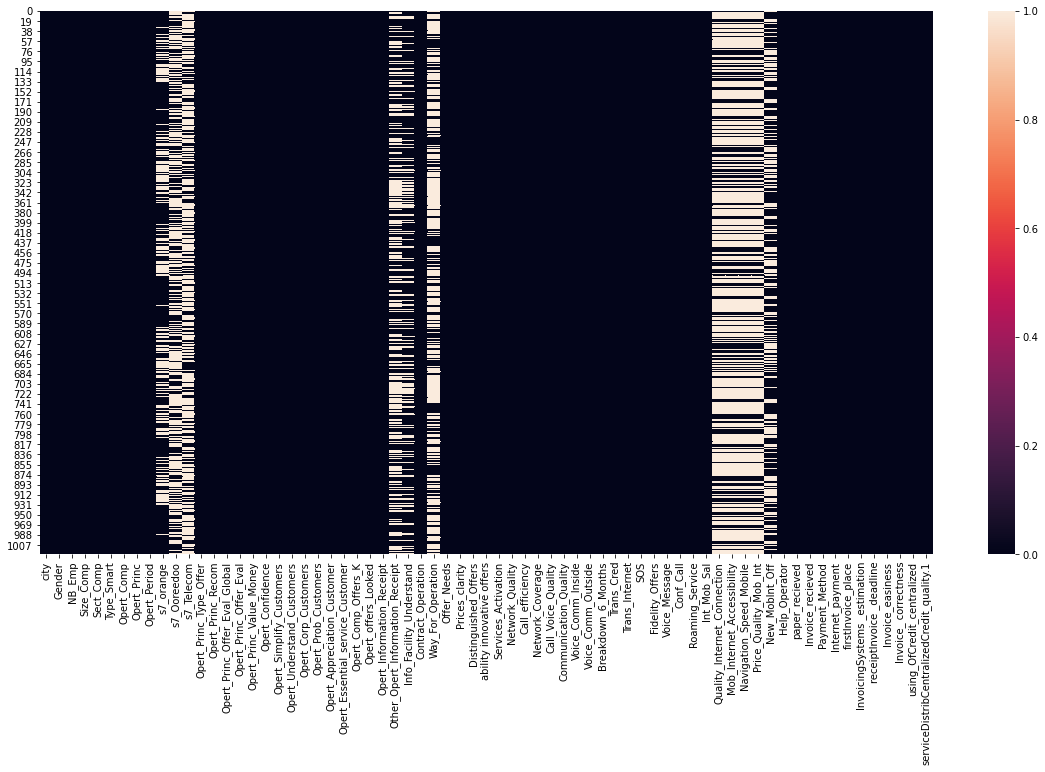

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

In [ ]:
print(df.shape)

for col in df.columns:
    if((df[col].isna().sum()/df.shape[0])<=0.5):
        df[col] = df[col].fillna(df[col].mode()[0])
        
df = df.dropna(axis=1)
        
print(df.shape)

(1025, 69)
(1025, 62)


In [ ]:
#Encodage 
data = pd.get_dummies(df, prefix_sep='_', drop_first=True)
print(data.shape)
data.head()

(1025, 131)


,Gender,NB_Emp,Size_Comp,Type_Smart,Opert_Princ_Recom,Opert_Princ_Offer_Eval_Global,Opert_Princ_Offer_Eval,Opert_Princ_Value_Money,Opert_Confidence,Opert_Simplify_Customers,...,"Other_Opert_Information_Receipt_Sur Facebook, Twitter, etc.",Other_Opert_Information_Receipt_Via affichage publicitaire,Contract_Operation_Signé un contrat avec votre opérateur principal pour la première fois,Contract_Operation_Signé un contrat avec votre opérateur principal pour la première fois + tRésilié un contrat ou abonnement,Contract_Operation_aucun,Contract_Operation_tSigné un contrat avec votre opérateur principal pour la première fois + tRésilié un contrat ou abonnement + tVous avez reçu une visite d’un commercial sans besoin particulier de votre part,"New_MobInt_Off_Non, certainement pas","New_MobInt_Off_Non, probablement pas","New_MobInt_Off_Oui, certainement","New_MobInt_Off_Oui, probablement"
0,1,20.0,0,1,6.0,6.0,6.0,6.0,5.0,5.0,...,0,0,0,0,1,0,0,0,0,0
1,0,11.0,0,1,5.0,5.0,6.0,5.0,5.0,6.0,...,0,0,0,0,1,0,0,0,0,0
2,0,11.0,0,1,6.0,6.0,6.0,6.0,5.0,6.0,...,0,0,0,0,1,0,0,0,0,0
3,0,10.0,0,1,3.0,5.0,7.0,5.0,6.0,7.0,...,0,0,0,0,0,0,0,0,0,0
4,0,12.0,0,0,1.0,6.0,5.0,6.0,2.0,3.0,...,0,0,1,0,0,0,0,1,0,0


<AxesSubplot:>

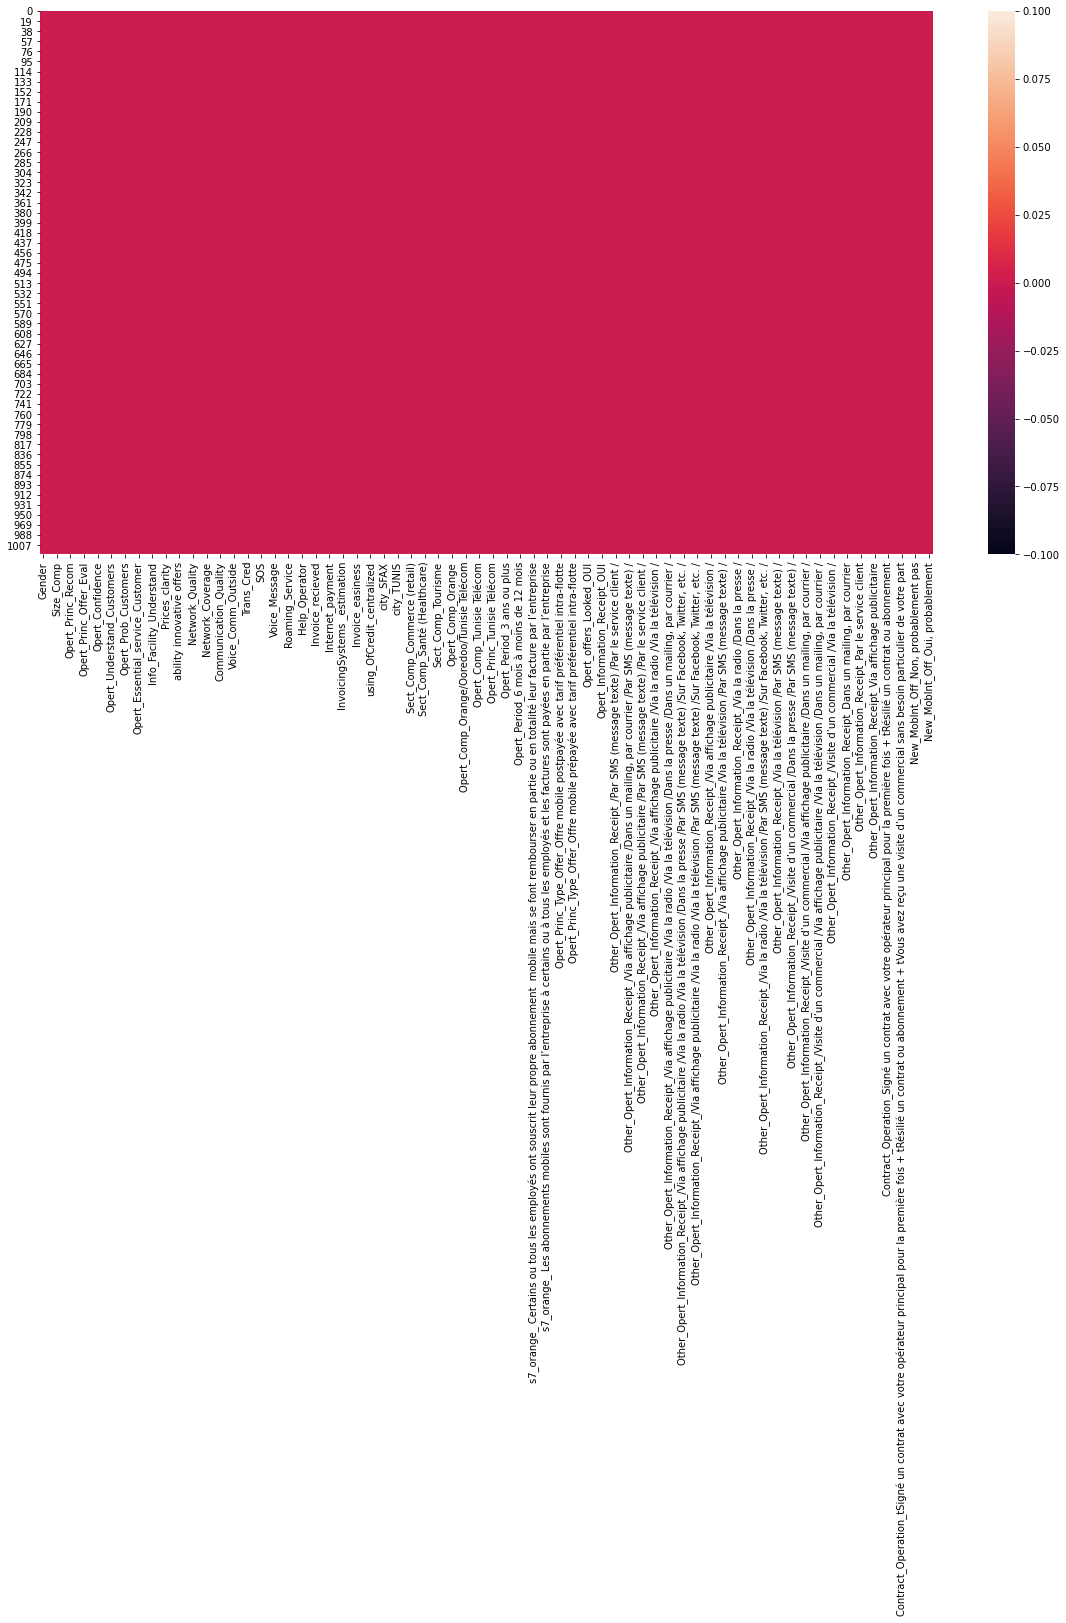

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

<AxesSubplot:ylabel='None'>

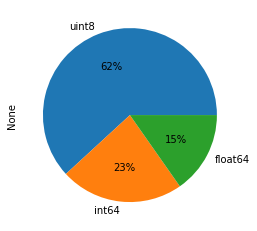

In [ ]:
data.dtypes.value_counts().plot.pie(autopct='%1.0f%%')

<AxesSubplot:>

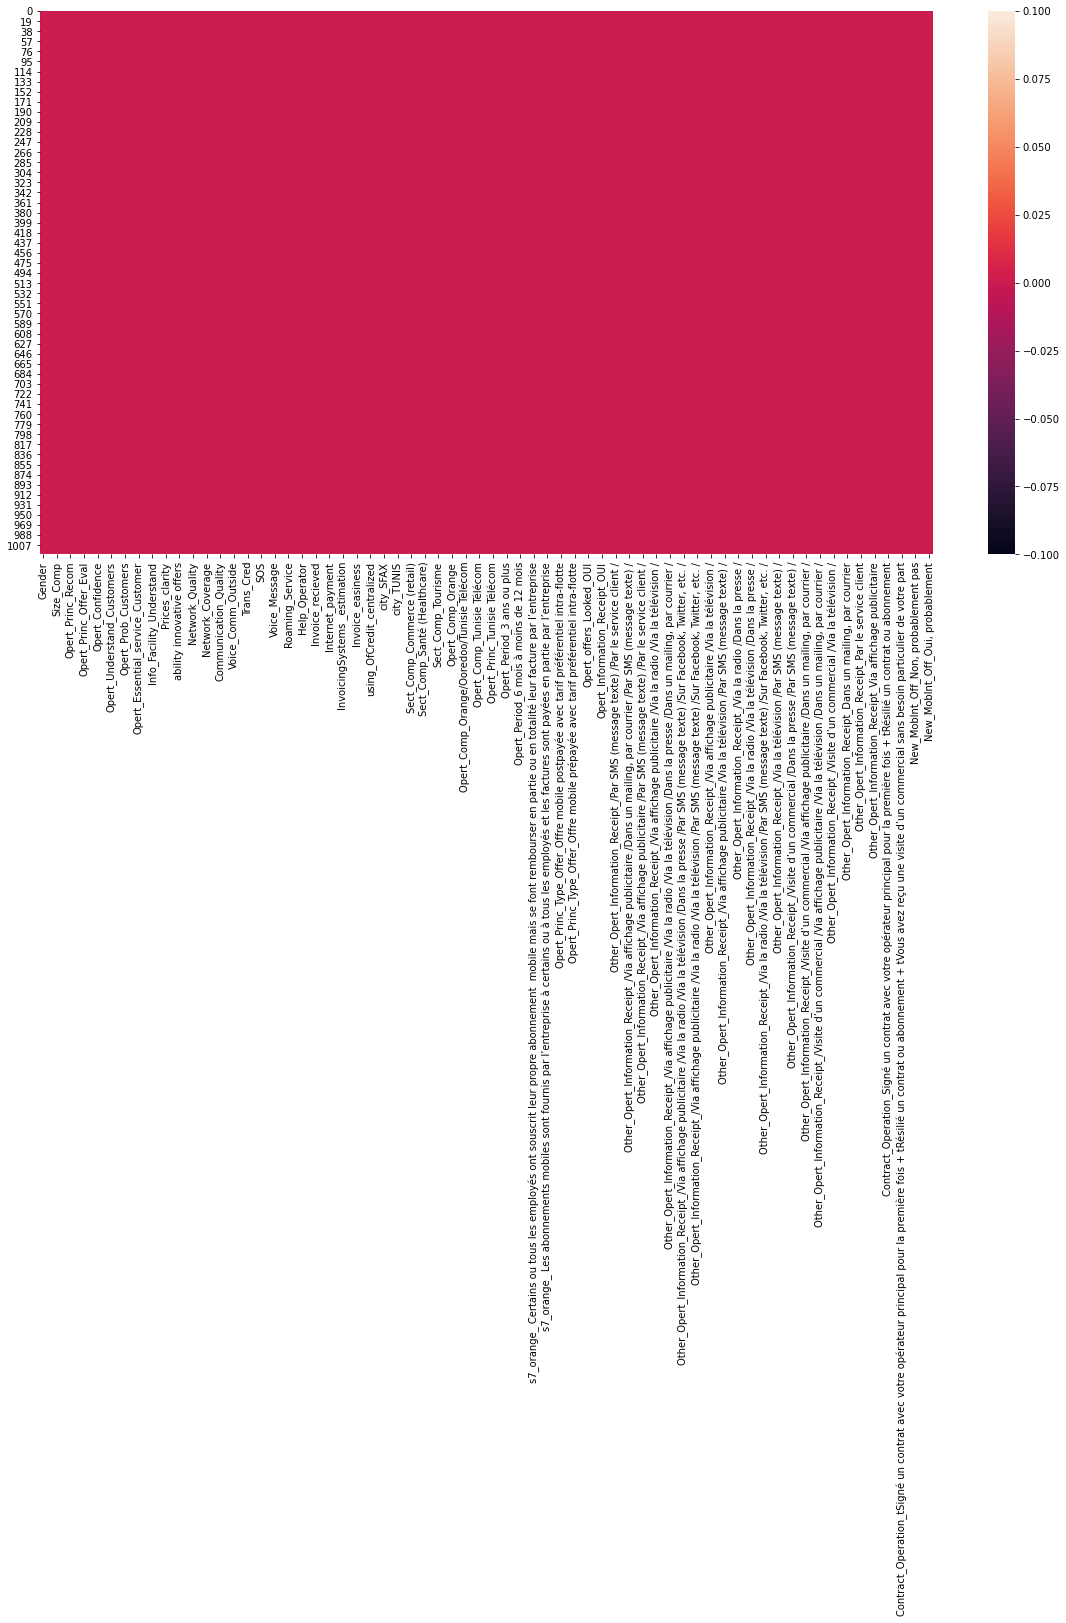

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

# K-Means

[0 0 0 ... 0 1 0]
2 Silhouette Score: 0.434
[2 0 0 ... 2 1 0]
3 Silhouette Score: 0.339
[2 0 0 ... 3 1 0]
4 Silhouette Score: 0.363
[0 1 1 ... 4 3 1]
5 Silhouette Score: 0.287
[1 2 2 ... 3 0 2]
6 Silhouette Score: 0.252
[3 4 4 ... 6 0 4]
7 Silhouette Score: 0.231
[7 5 5 ... 3 4 5]
8 Silhouette Score: 0.236
[6 2 7 ... 8 0 7]
9 Silhouette Score: 0.219
[0 2 8 ... 4 1 8]
10 Silhouette Score: 0.221
[ 3  7 10 ...  5  2 10]
11 Silhouette Score: 0.221
[10  1  6 ...  4  2  8]
12 Silhouette Score: 0.250
[ 7  3 11 ...  6  0  3]
13 Silhouette Score: 0.231
[ 4 11  3 ...  6  2  3]
14 Silhouette Score: 0.228
[ 6  2 10 ... 13 14 10]
15 Silhouette Score: 0.232
[ 4 13 12 ... 14  7 12]
16 Silhouette Score: 0.221
[ 5 12 12 ... 13 15 12]
17 Silhouette Score: 0.242
[12 15 14 ... 17  7 14]
18 Silhouette Score: 0.223
[ 4 17  6 ... 10  7  6]
19 Silhouette Score: 0.255
[16  2 13 ... 19  3 13]
20 Silhouette Score: 0.262
[ 7 16 14 ... 12  1 14]
21 Silhouette Score: 0.244
[ 2 10 19 ... 14 17 19]
22 Silhouette Scor

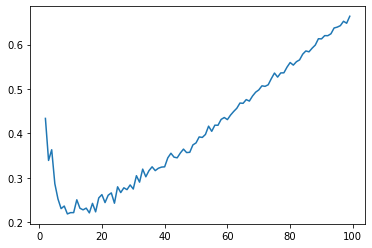

In [ ]:
#Modelisation
from sklearn import cluster 
#evaluation
from sklearn.metrics import silhouette_samples, silhouette_score

y_pred_km_tab = []
silhouette_km_tab = []

for i in range(2,100):
    #modelisation
    kmeans = cluster.KMeans(n_clusters=i);
    kmeans.fit(data);
    print(kmeans.labels_)
    y_pred_km_tab.append(kmeans.labels_)
    #evaluation
    score = silhouette_score(data, kmeans.labels_, metric='euclidean')
    silhouette_km = score
    print(i,'Silhouette Score: %.3f' % score)
    silhouette_km_tab.append(silhouette_km)

plt.plot(range(2,100),silhouette_km_tab)

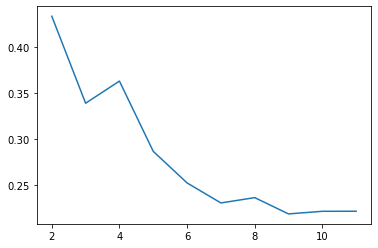

In [ ]:
plt.plot(range(2,12),silhouette_km_tab[:10])

In [ ]:
#modelisation
kmeans = cluster.KMeans(n_clusters=4);
kmeans.fit(data);
print(kmeans.labels_)
#evaluation
score = silhouette_score(data, kmeans.labels_, metric='euclidean')
silhouette_km = score
print('Silhouette Score: %.3f' % score)

[3 2 2 ... 0 1 2]
Silhouette Score: 0.363


In [ ]:
#Centroides
kmeans.cluster_centers_

array([[ 5.15151515e-01,  1.58181818e+01,  9.09090909e-02,
         3.63636364e-01,  3.90909091e+00,  5.09090909e+00,
         3.90909091e+00,  4.45454545e+00,  2.54545455e+00,
         3.09090909e+00,  5.09090909e+00,  2.45454545e+00,
         2.81818182e+00,  2.63636364e+00,  2.45454545e+00,
         5.45454545e-01,  5.18181818e+00,  1.90909091e+00,
         2.63636364e+00,  1.90909091e+00,  2.54545455e+00,
         4.54545455e+00,  6.27272727e+00,  2.81818182e+00,
         6.27272727e+00,  7.00000000e+00,  6.45454545e+00,
         6.18181818e+00,  6.45454545e+00,  7.27272727e-01,
         9.09090909e-02,  9.09090909e-02,  9.09090909e-02,
         9.09090909e-02,  9.09090909e-02,  9.09090909e-02,
         2.72727273e-01,  2.72727273e-01,  9.09090909e-02,
         1.00000000e+00,  9.09090909e-02,  5.55111512e-17,
         1.81818182e-01,  9.09090909e-02,  3.00000000e+00,
         3.00000000e+00,  3.09090909e+00,  3.63636364e+00,
         9.09090909e-02,  4.54545455e+00, -5.55111512e-1

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated fun

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

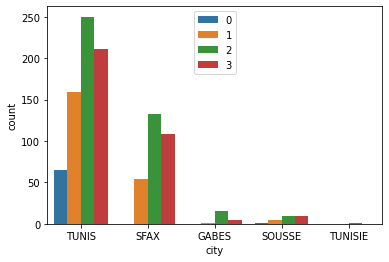

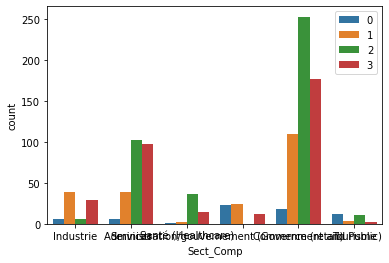

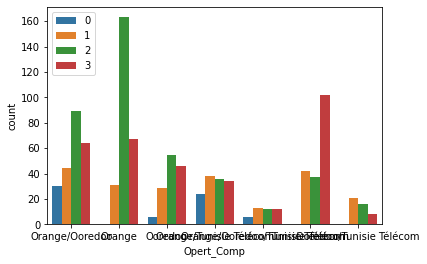

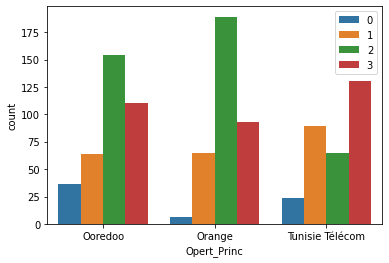

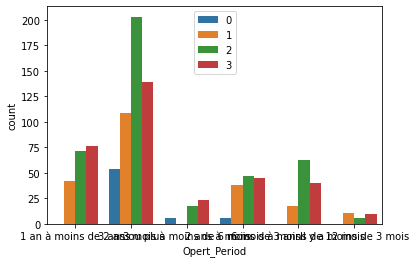

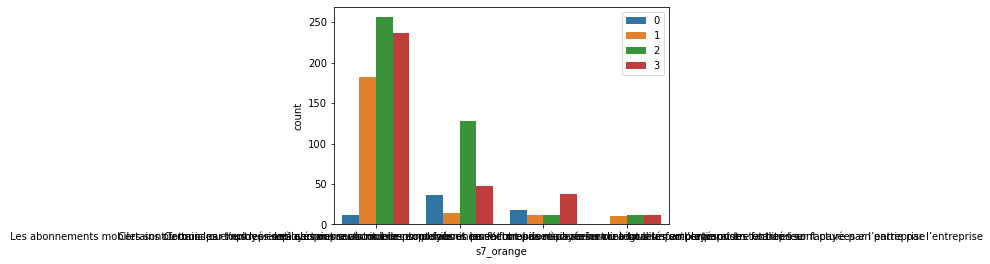

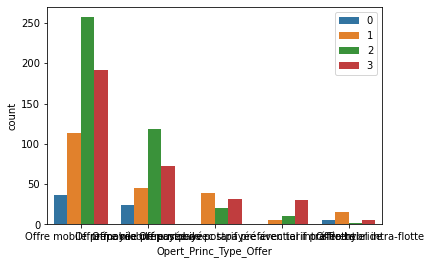

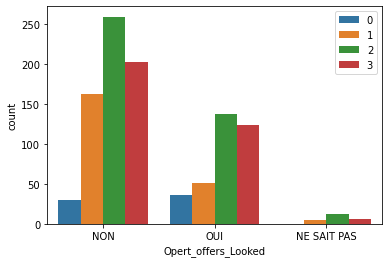

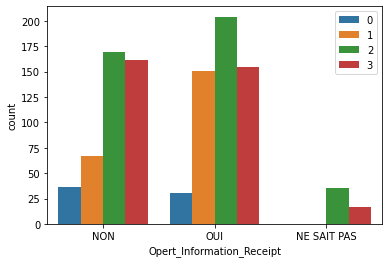

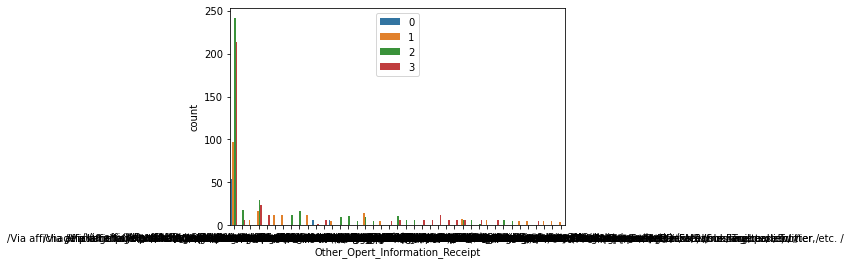

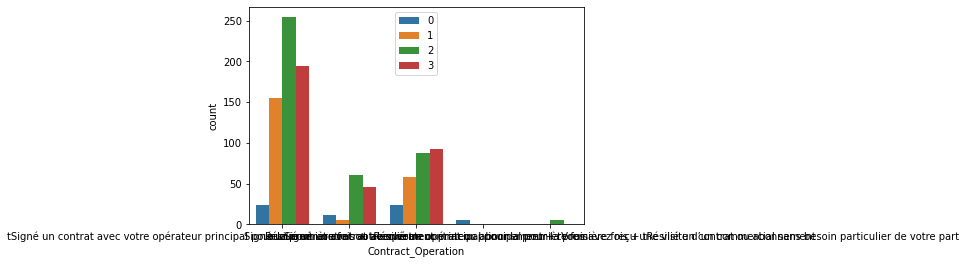

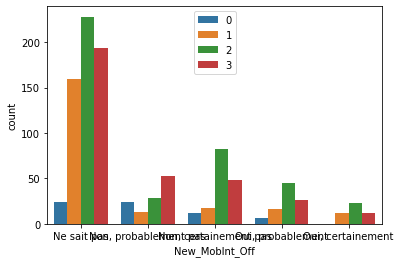

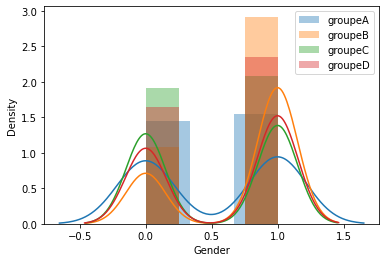

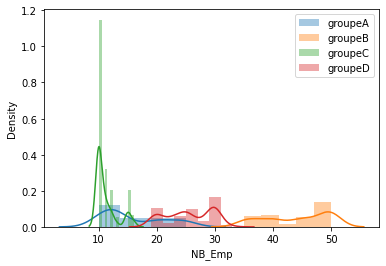

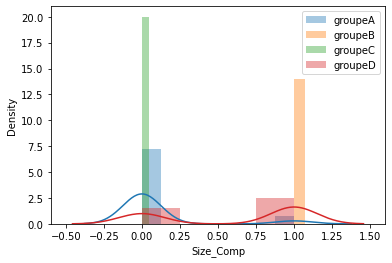

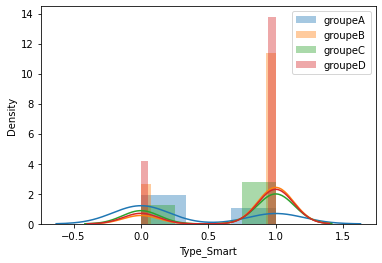

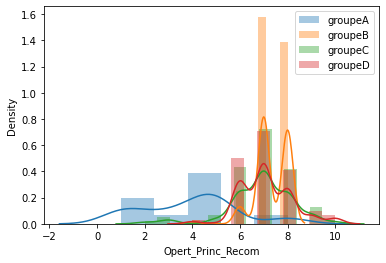

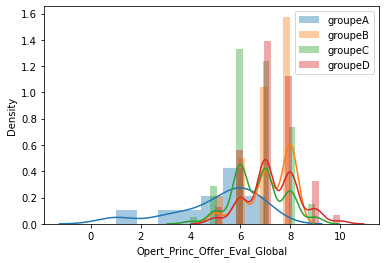

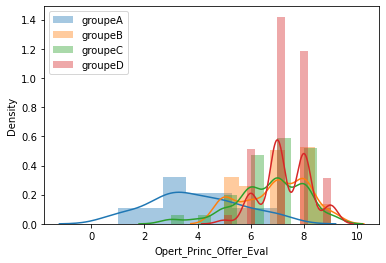

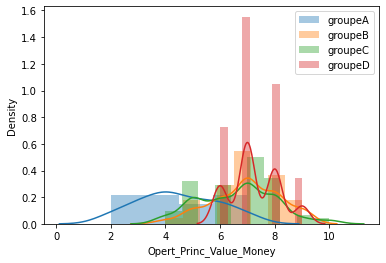

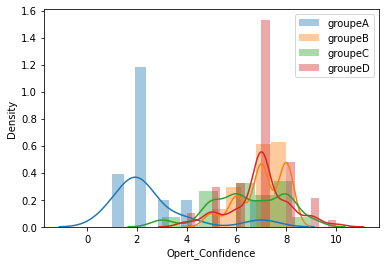

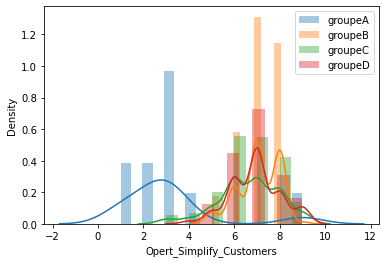

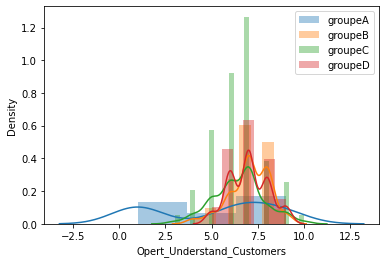

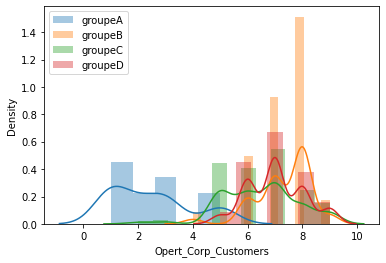

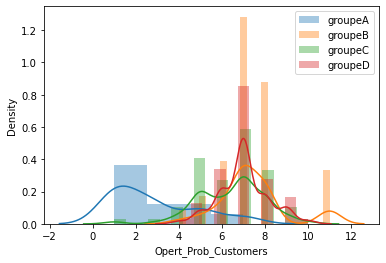

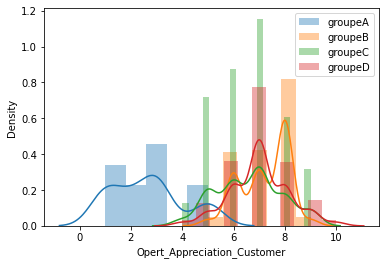

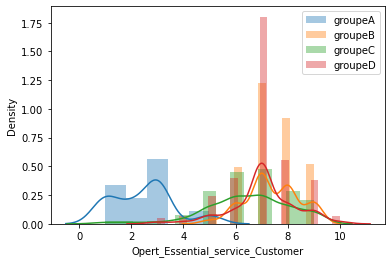

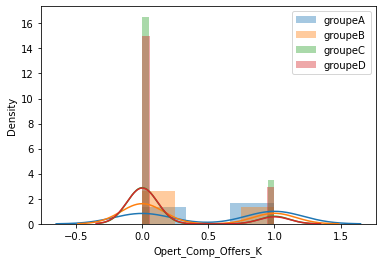

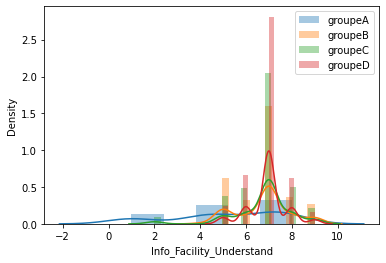

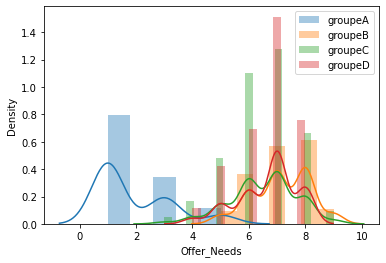

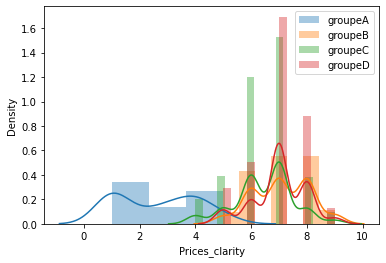

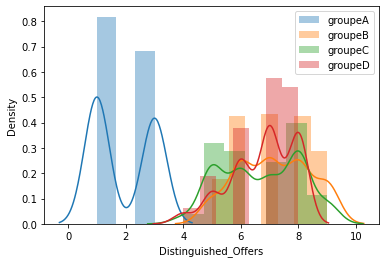

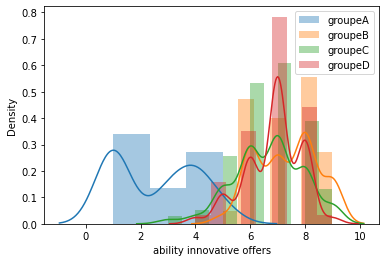

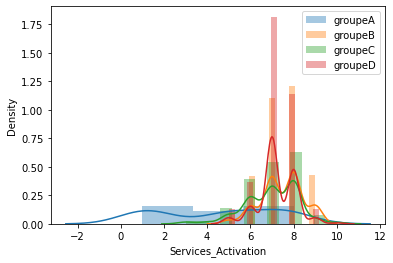

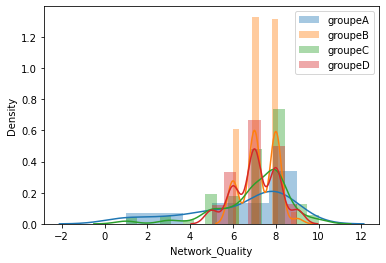

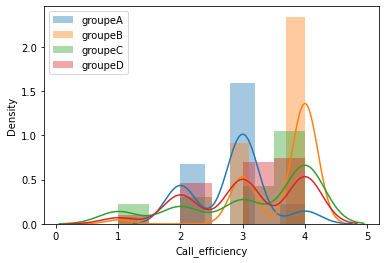

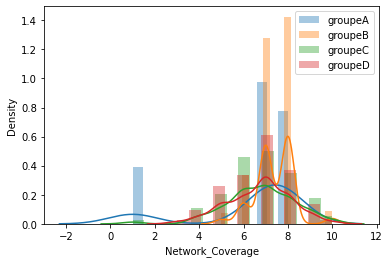

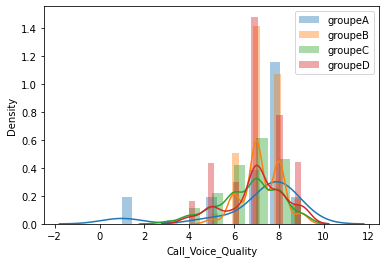

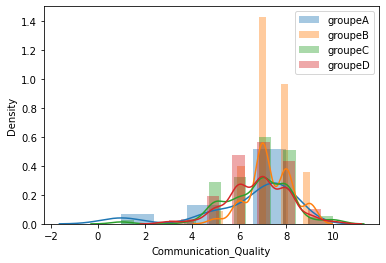

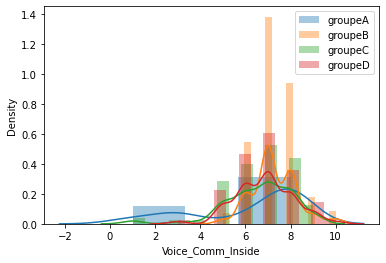

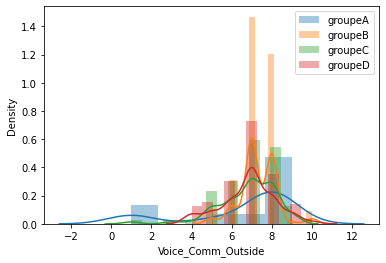

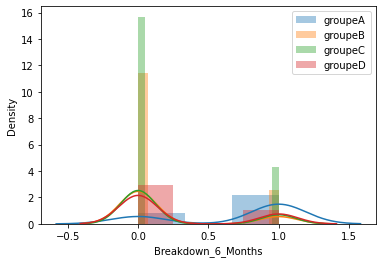

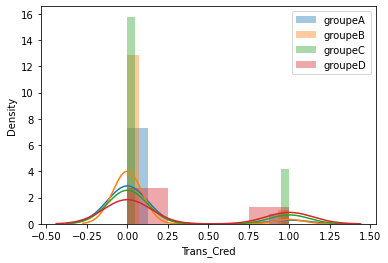

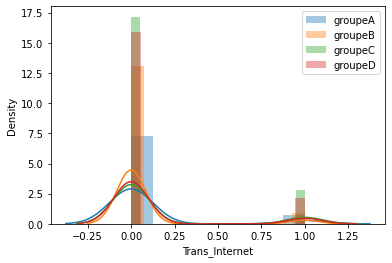

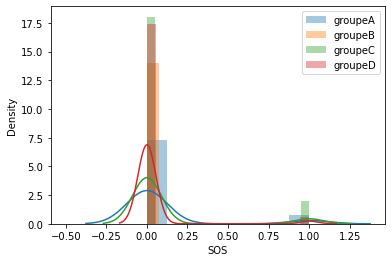

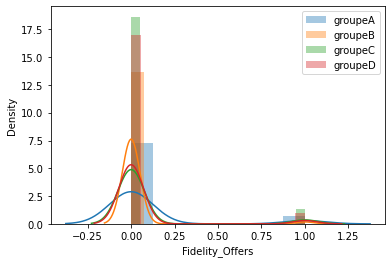

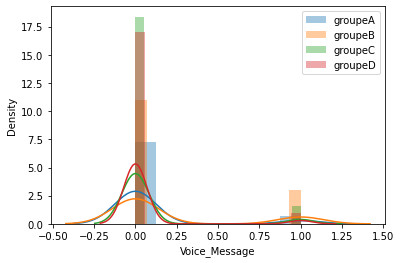

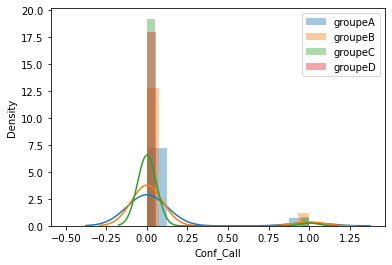

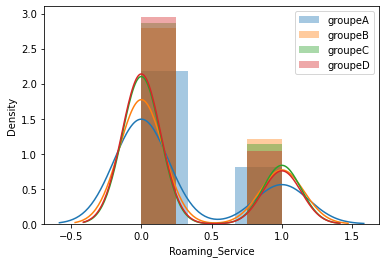

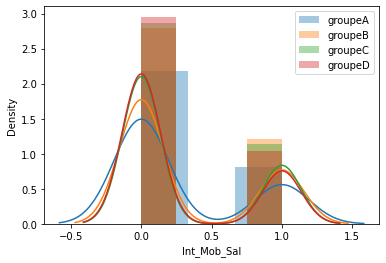

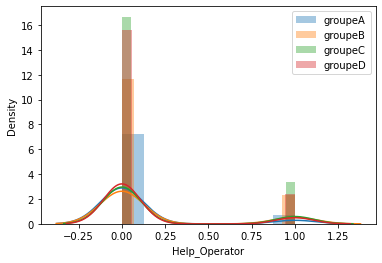

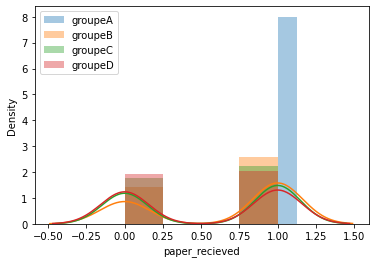

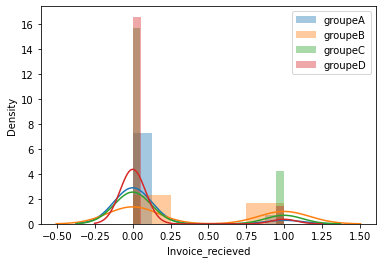

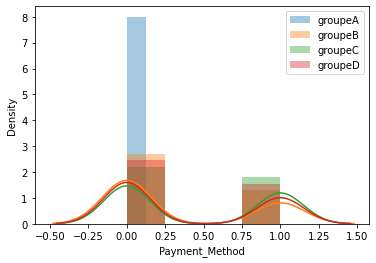

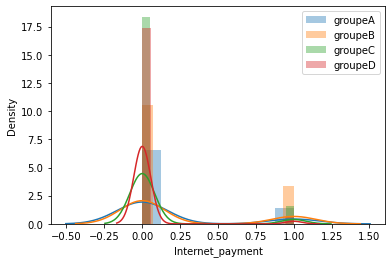

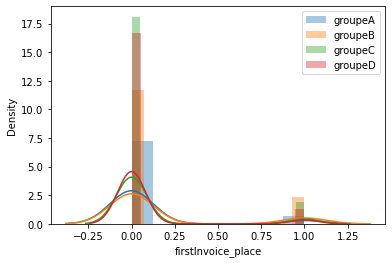

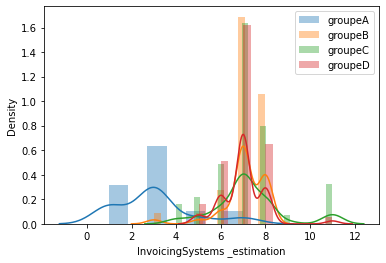

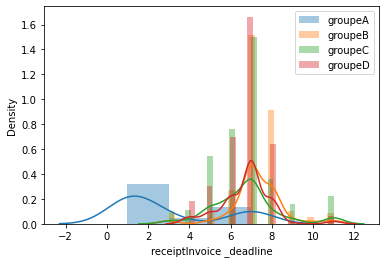

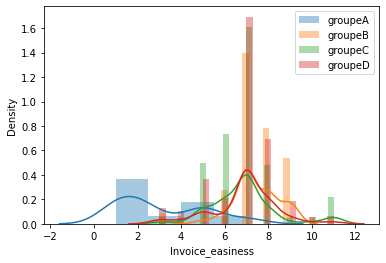

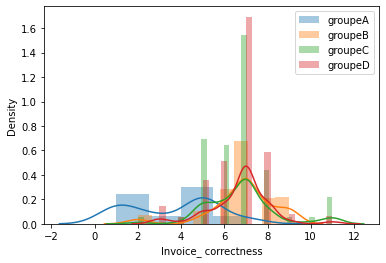

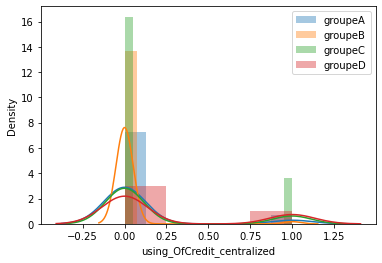

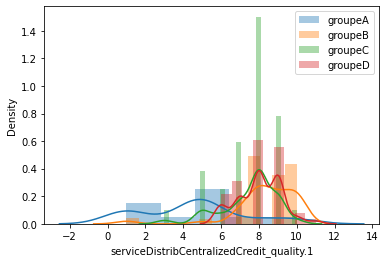

In [ ]:
#Profiling
groupeA=df[kmeans.labels_==0]

groupeB=df[kmeans.labels_==1]

groupeC=df[kmeans.labels_==2]

groupeD=df[kmeans.labels_==3]

data_predict = df
data_predict.insert(len(data_predict.columns), "Profiling_Kmeans", kmeans.labels_)
#df.insert(len(df.columns), "Profiling_Kmeans", kmeans.labels_)
#data_predict['Profiling'] = kmeans.labels_
#data_predict

for col in (data_predict.columns[data_predict.dtypes==object]): 
    plt.figure()
    sns.countplot(x=col,hue='Profiling_Kmeans',data=data_predict)
    plt.legend()
    
    
for col in (data_predict.columns[data_predict.dtypes!=object].drop('Profiling_Kmeans')): 
    plt.figure()
    sns.distplot(groupeA[col],label='groupeA')
    sns.distplot(groupeB[col],label='groupeB')
    sns.distplot(groupeC[col],label='groupeC')
    sns.distplot(groupeD[col],label='groupeD')
    plt.legend()


    GROUPE A :size_comp[10,24],opert_princ_recom[0,5] ,   opert_princ_offer_eval[0,4],opert_princ_value_money[0,4],opert_confidence[0,4], 
           opert_simplify_customers[0,4] , opert_understand_customers[pic en 1] , opert_corps_customers[0,4], 
          opert_prob_customers[0,4] , opert_appreciation_customer[0,4] , opert_essential_service_customer[0,4]
           offer_needs[0,4], prices_clarity[0,4] , distinguished_offers[0,4] , ability_innovaive_offers [0,4] ,
          , ability_innovative_offer[<5],call_effeciency[pic en 3],network_coverage[0,4],
           call_voice_quality[0,3],communication_quality[0_4],voice_comm_inside[0,4],voice_comm_outside[0,4]
           ,groupe ayant eu le plus de panne en 6 mois,invoicing_system_estimation[0,4]
           ,le moins satisfails de la qualité de la centralisation des crédits 
           
    
    
    GROUPE B:3fois plus d'homme que de femme,nb_emp[35,60],
            opert_princ_recom[7,8],
            opert_simplify_customers[8],
            opert_corps_customers[pic en 8],
            opert_prob_customers[10,12],
            call_effeciency[pic en 4],
            network_coverage[8],
            call_voice_quality[7,8],
            communication_quality[7],
            opert_appreciation_customer[pic en 8] ,
            opert_confidence[8],
            opert_corps_customers[8],
            voice_comm_inside[7,8],
            voice_comm_outside[7,8],
            invoicing_system_estimation[pic en 7]
            Utilise le moins la centralisation des crédits
       
    GROUPE C: nb_emp[10],opert_corps_customers[pic en 7],groupe qui utilise le moins d'appel conférence
    
    

     GROUPE D:  nb_emp[20,35], 
                opert_understand_customers[5],
                opert_princ_value_money[6,8]
                ,distinguished_offers[7],
                ability_innovative_offer[7]  , 
                opert_corps_customers[pic en 7],
                opert_prob_customers[pic en 7],
                opert_appreciation_customer[pic en 7],
                le groupe qui se renseigne le plus sur les offres de son entreprise.,
                info_facility_unserstand[6,8],
                groupe qui n'utilse jamais le serviceSOS,
                groupe ayant le moins recours à la facturation en ligne et celui qui paye le moins en ligne,
                invoicing_system_estimation[pic en 7]
                

    


  ##  Constatations

## Groupe A:
	Groupe ayant globalement le taux de satisfaction le plus bas.
	Particulatités:
	- Comprend principalement les petites entreprises (10 à 24 employés)
	- Très insatisfaits des services (notes entre 0 et 4)	
	- Très insatisfaits de la couverture réseau et de sa qualité
	- Estiment que la tarification n'est pas claire
	- Groupe ayant subi le plus de pannes au cours des 6 derniers mois (lors du questionnaire)
	- Les moins satisfaits de la qualité de la centralisation des crédits.	
	- Groupe ayant donné les notes les plus basses à la facturation et au moyens de paiements. 	

## Groupe B:
	Groupe ayant globalement le taux de satisfaction le plus haut
	Particularités:
	- Comprends principalement les entreprises de 35 à 60 employés.
	- 3 fois plus d'hommes que de femmes.
	- Très satisfaits des services 
	- Très satisfaits de la qualité du réseau et de sa couverture
	- Très satisfaits de la qualité des communications 
	- Groupe ayant le plus d'appréciation pour son opérateur principal.
	- Groupe ayant le moins recours à la centralisation des crédits.
	

## Groupe C:
	Groupe passablement satisfait	
	Particularités:
	- Entreprises de moins de 10 employés
	- Groupe qui utilise le moins les appels en conférence.
	

## Groupe D:
	Groupe assez satisfait
	Particularités:
	- Entreprises composées de 20 à 35 employés.
	- Donnes les notes les plus  élevées après le groupe B.
	- Le groupe qui se renseigne le plus  sur les offres de son opérateur.
	- N'utilise jamais  le service SOS
	- Groupe ayant le moins recours à la facturation et aux paiements en ligne.

Par ordre de satisfaction décroissant: B - D - C - A

# CAH (Classification Ascendante Hiérarchique)

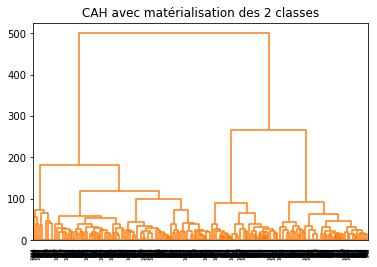

In [ ]:
#visualisation : dendrogramme
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

#générer la matrice des distances 
Z = linkage(data,method='ward',metric='euclidean')

#affichage du dendrogramme 
# matérialisation des deux classes (hauteur t = 17500) 
plt.title('CAH avec matérialisation des 2 classes') 
dendrogram(Z,labels=data.index,orientation='top',color_threshold=17500) 
plt.show()

[1 1 1 ... 1 0 1]
Silhouette Score: 0.401
[0 0 0 ... 0 2 0]
Silhouette Score: 0.318
[0 0 0 ... 3 2 0]
Silhouette Score: 0.345
[0 4 4 ... 3 2 4]
Silhouette Score: 0.261
[3 4 4 ... 1 2 4]
Silhouette Score: 0.255
[3 4 4 ... 1 0 4]
Silhouette Score: 0.240
[1 4 4 ... 0 3 4]
Silhouette Score: 0.211
[0 4 4 ... 8 1 4]
Silhouette Score: 0.219
[8 4 4 ... 3 0 4]
Silhouette Score: 0.231
[8 1 1 ... 3 4 1]
Silhouette Score: 0.232
[8 1 1 ... 3 4 1]
Silhouette Score: 0.242
[8 0 0 ... 1 4 0]
Silhouette Score: 0.242
[ 8  1 13 ...  0  4 13]
Silhouette Score: 0.231
[ 3  0 13 ... 14  4 13]
Silhouette Score: 0.238
[ 3  5 13 ... 14  4 13]
Silhouette Score: 0.244
[ 3  5 13 ... 14  4 13]
Silhouette Score: 0.251
[ 3  5  6 ... 14  4  6]
Silhouette Score: 0.241
[ 3  5  2 ... 14  4  2]
Silhouette Score: 0.231
[ 1  5  2 ... 14  4  2]
Silhouette Score: 0.239
[ 0  5  2 ... 14  4  2]
Silhouette Score: 0.247
[10  5  2 ... 14  1  2]
Silhouette Score: 0.257
[10  5  2 ... 14  0  2]
Silhouette Score: 0.263
[10  5  2 ... 14

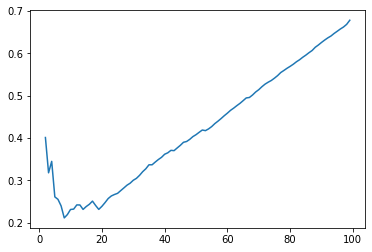

In [ ]:
#modelisation
from sklearn.cluster import AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_samples, silhouette_score

y_pred_cah_tab = []
silhouette_cah_tab = []

for i in range(2,100):
    #modelisation
    cah = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    cah.fit(data)
    print(cah.labels_);
    y_pred_cah = cah.labels_
    y_pred_cah_tab.append(cah.labels_)
    #evaluation
    score = silhouette_score(data, cah.labels_, metric='euclidean')
    silhouette_cah = score
    print('Silhouette Score: %.3f' % score)
    silhouette_cah_tab.append(score)

plt.plot(range(2,100),silhouette_cah_tab)

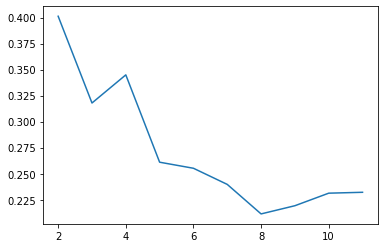

In [ ]:
plt.plot(range(2,12),silhouette_cah_tab[:10])

In [ ]:
#modelisation
cah = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cah.fit(data)
print(cah.labels_);
#evaluation
score = silhouette_score(data, cah.labels_, metric='euclidean')
silhouette_cah = score
print('Silhouette Score: %.3f' % score)

[0 0 0 ... 3 2 0]
Silhouette Score: 0.345


C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated fun

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zghal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

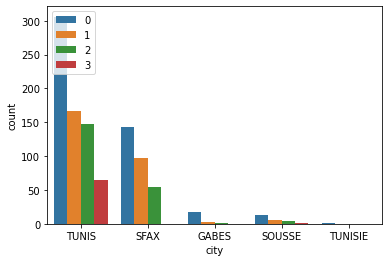

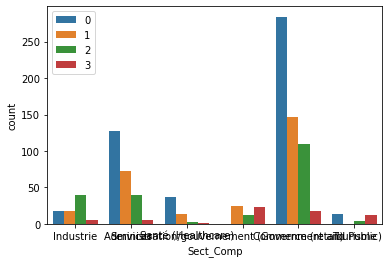

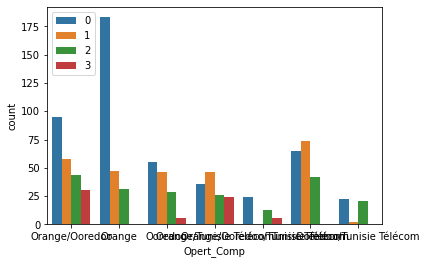

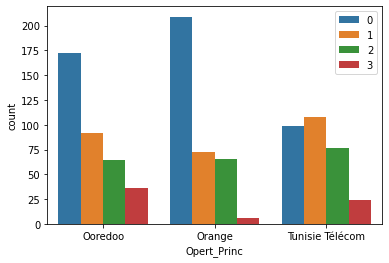

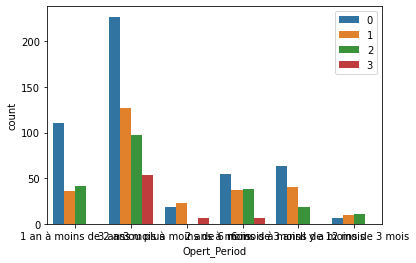

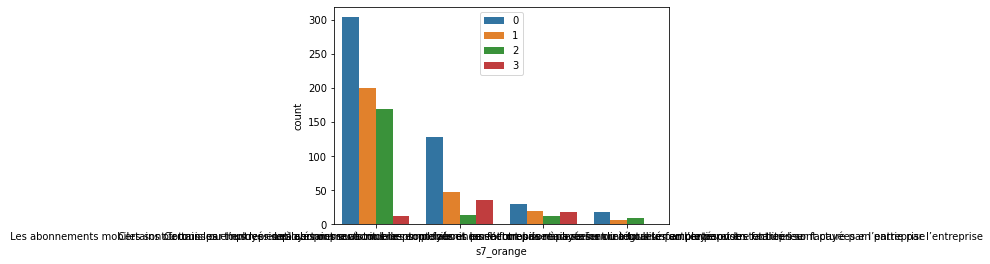

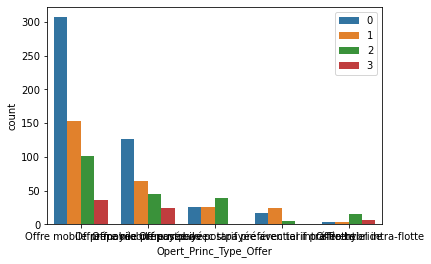

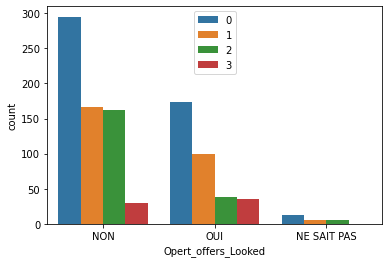

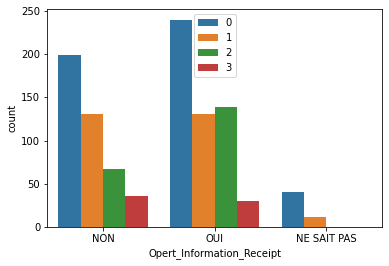

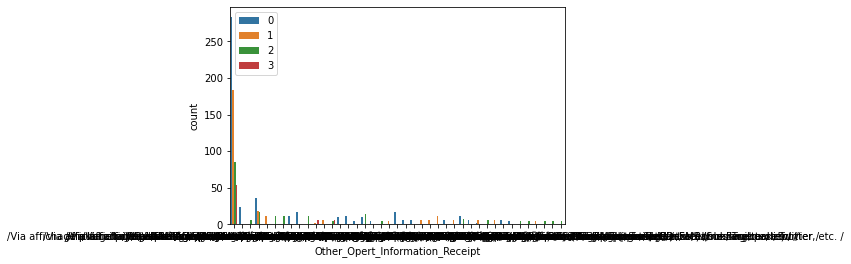

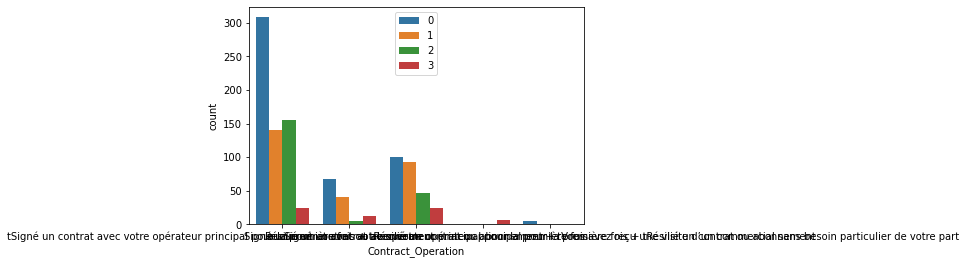

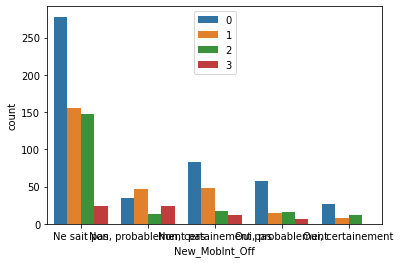

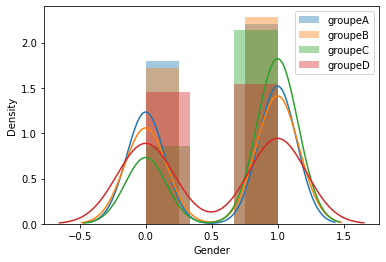

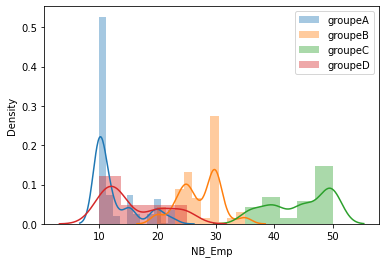

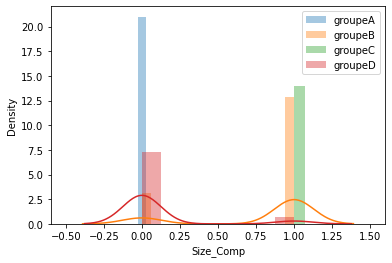

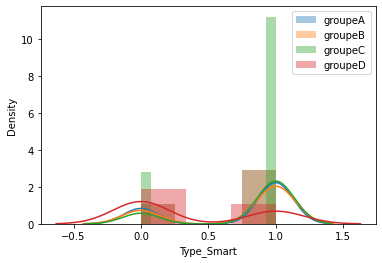

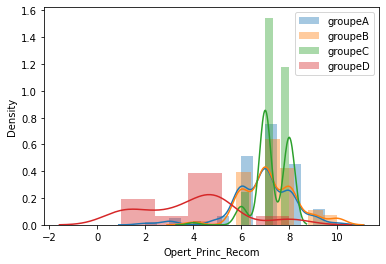

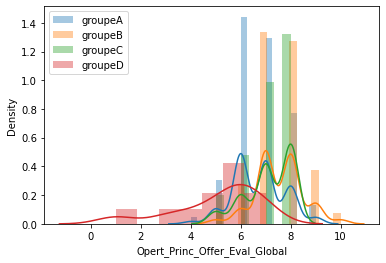

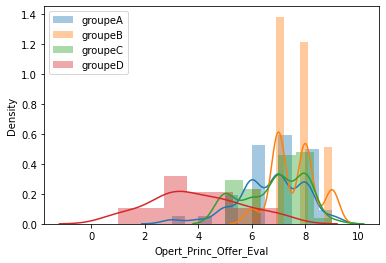

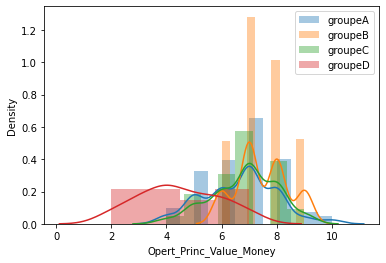

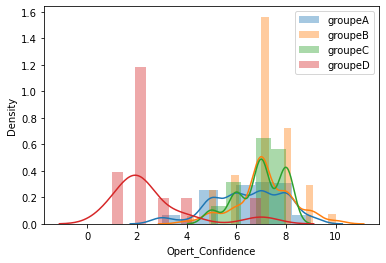

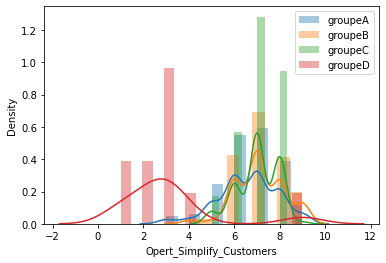

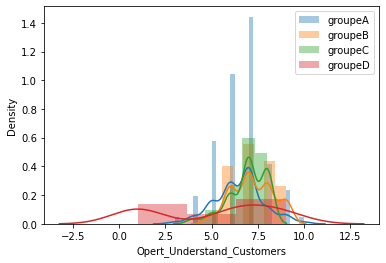

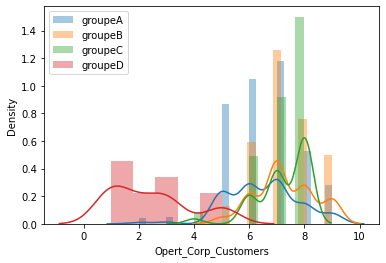

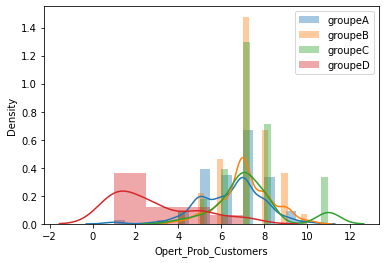

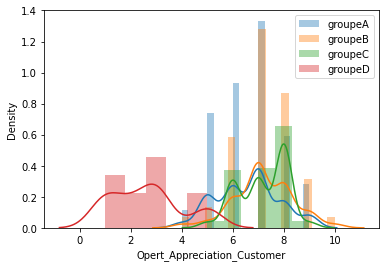

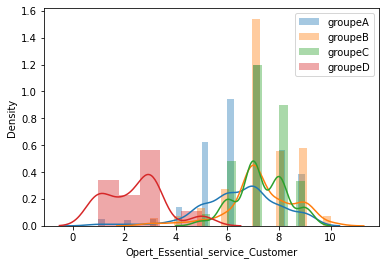

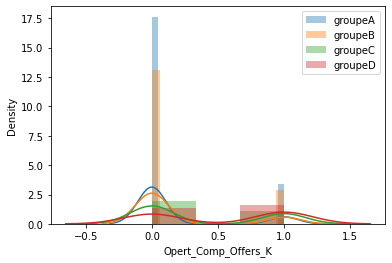

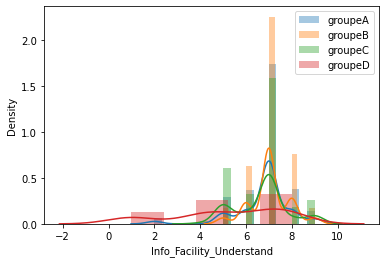

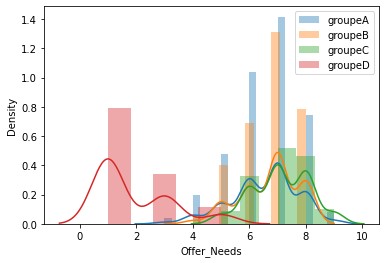

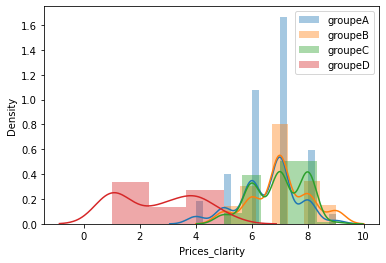

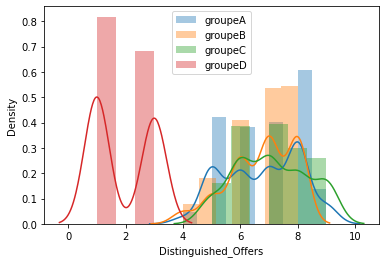

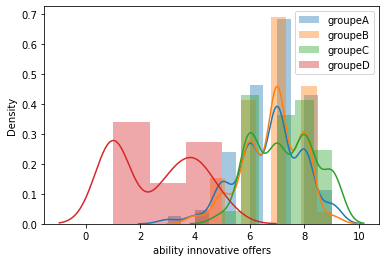

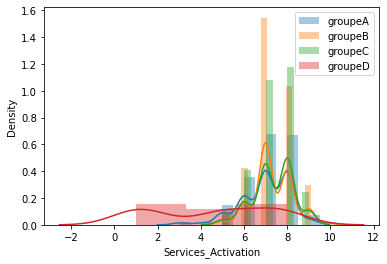

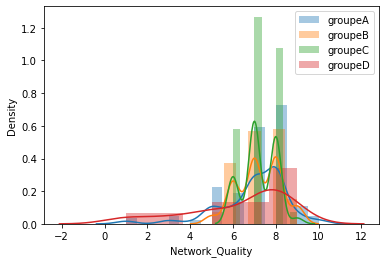

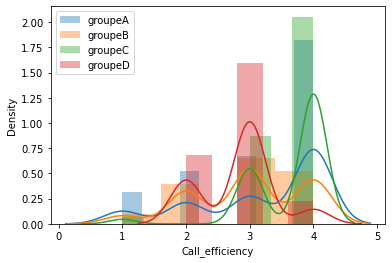

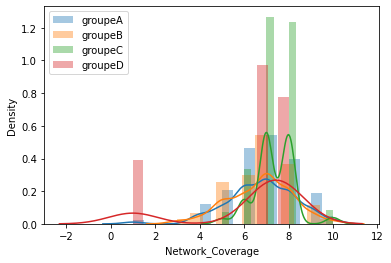

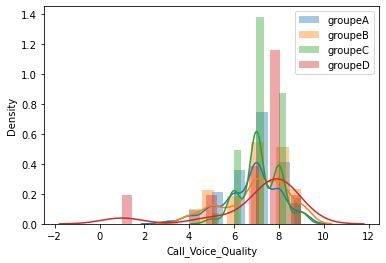

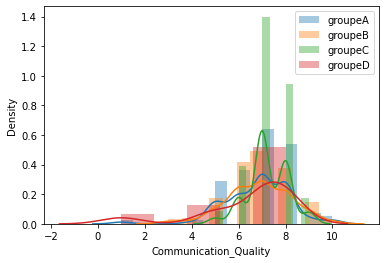

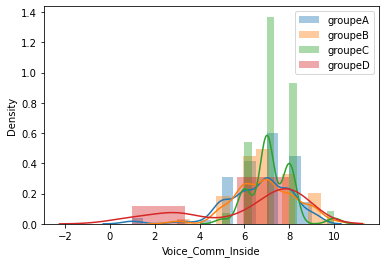

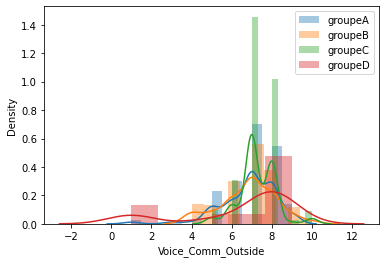

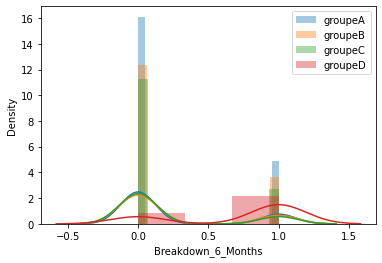

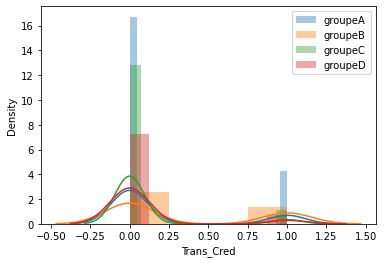

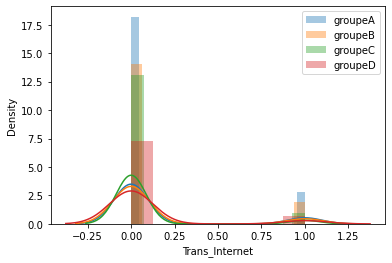

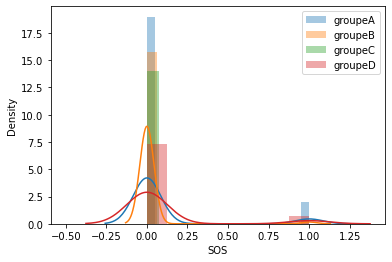

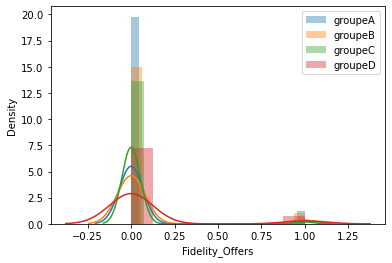

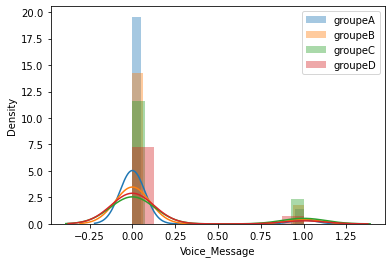

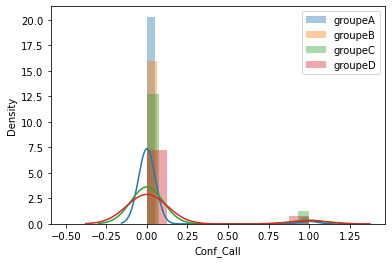

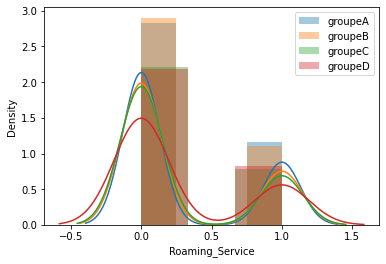

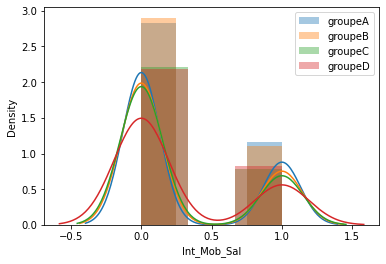

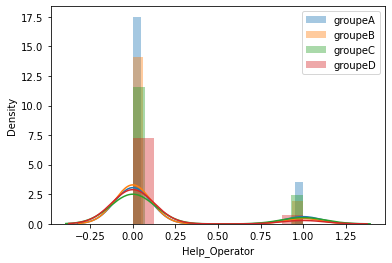

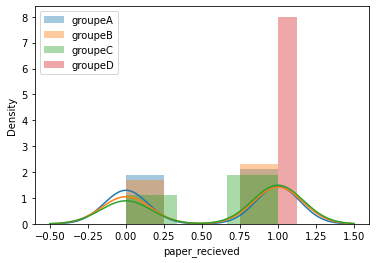

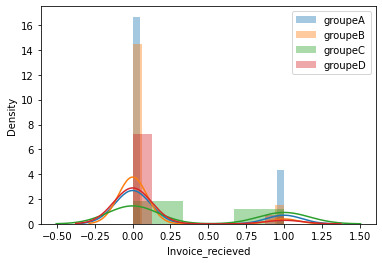

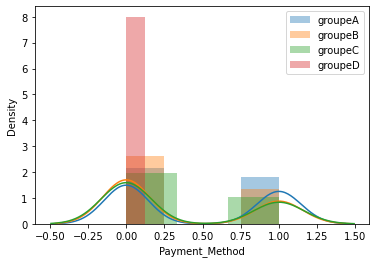

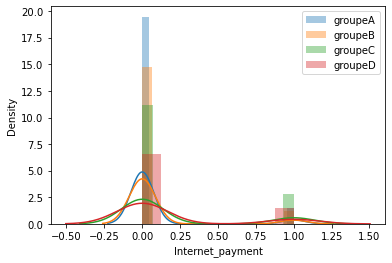

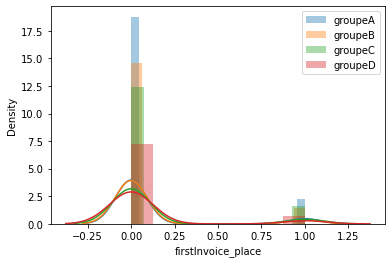

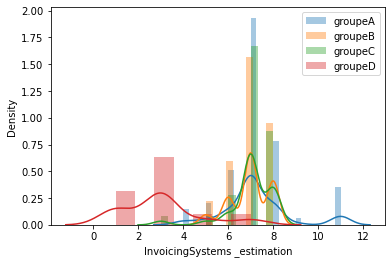

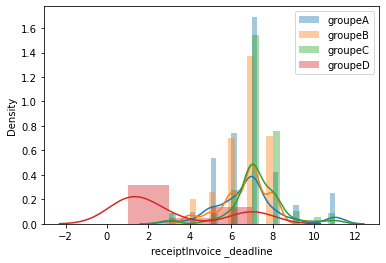

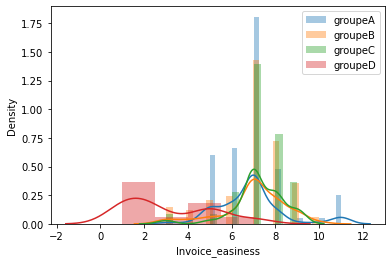

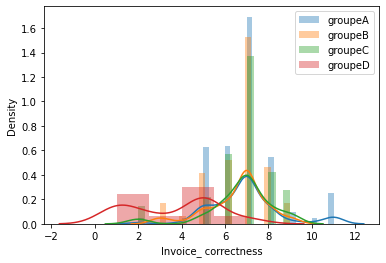

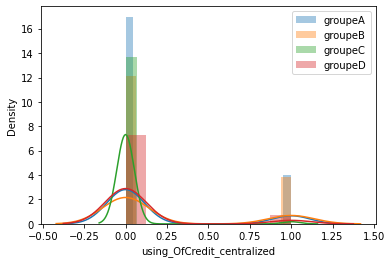

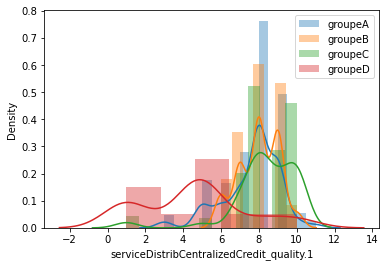

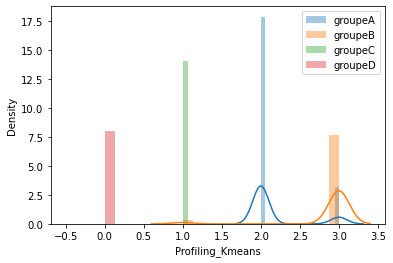

In [ ]:
#Profiling
groupeA=df[cah.labels_==0]

groupeB=df[cah.labels_==1]

groupeC=df[cah.labels_==2]

groupeD=df[cah.labels_==3]

data_predict_cah = df
data_predict_cah.insert(len(data_predict_cah.columns), "Profiling_cah", cah.labels_)
#df.insert(len(df.columns), "Profiling_cah", cah.labels_)
#data_predict['Profiling'] = kmeans.labels_

for col in (data_predict_cah.columns[data_predict_cah.dtypes==object]):
    plt.figure()
    sns.countplot(x=col,hue='Profiling_cah',data=data_predict_cah)
    plt.legend()
    
    
for col in (data_predict_cah.columns[data_predict_cah.dtypes!=object].drop('Profiling_cah')): 
    plt.figure()
    sns.distplot(groupeA[col],label='groupeA')
    sns.distplot(groupeB[col],label='groupeB')
    sns.distplot(groupeC[col],label='groupeC')
    sns.distplot(groupeD[col],label='groupeD')
    plt.legend()

In [ ]:
#on constate que les profils sont les memes que ceux obtenus par k_means

In [ ]:
#2.Comparaison des algorithmes non supervisés
silhouette = pd.Series([silhouette_km,silhouette_cah],  
        index=['K-Means', 'cah'])
accuracy = pd.DataFrame({'Silhouette': silhouette})
accuracy

,Silhouette
K-Means,0.363163
cah,0.344916


#     Conclusion

     

On dégage donc 4 profils principaux correspondants aux archetypes suivants
- Trés satisfaits:
- Assez satisfaits:
- Moyennement satisfaits:
- Non satisfaits:

In [ ]:
#data['Profiling_Kmeans'].dtypes.value_counts().plot.pie(autopct='%1.0f%%')